# Notes:

You are banned from using loops (`for` or `while` or any other) for this entire workshop!

You shouldn't be using loops almost ever with pandas in any case, so break out of the habit now.

## 1. DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

**2.** Select only the rows where visits are 3 or more. Which types of animals are these?

**3.** Select the rows where visists are 3 and the animal is a cat

**4.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

**5.** Calculate the mean age for each different animal in `df`.

**6.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

#1.

df = pd.DataFrame(data, index=labels)

#2.
##To select rows
df.loc[df.visits >= 3]

##To output animals
df.loc[df.visits >= 3, 'animal']

#3.
df.loc[(df.visits >= 3) & (df.animal == 'cat')]

#4.
sum(df.visits)

#5.
df.groupby('animal')['age'].mean()

#6.
k = {'animal': 'platypus', 'age': '90', 'visits': 4, 'priority': 'no'}
df = df.append(k, ignore_index=True)
df.drop(10)

,animal,age,visits,priority
0,cat,2.5,1,yes
1,cat,3,3,yes
2,snake,0.5,2,no
3,dog,NaN,3,yes
4,dog,5,2,no
5,cat,2,3,no
6,snake,4.5,1,no
7,cat,NaN,1,yes
8,dog,7,2,no
9,dog,3,1,no


# 2.1 Shifty problem

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

### Hint: use the `shift()` method

In [2]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

df.loc[df.A.shift(-1) != df.A]

,A
0,1
2,2
3,3
4,4
7,5
8,6
10,7


# 2.2 columns sum min

Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? Return that column's label.

In [27]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df_ = df.sum()
min(df_)

1.6186670199502955

# 2.3 Duplicates

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

**hint:** There's a method for to find duplicate rows for you

In [28]:
def unique_rows(df):
    return (len(df.index) - sum(df.duplicated()))

unique_rows(df)

5

# 2.4 Group Values

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.  You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [30]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

df_ = df.groupby('grps').sum()
print(df_)

      vals
grps      
a      416
b      160
c      380


# 3. Cleaning Data

### Making a DataFrame easier to work with

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

**1.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [40]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df.FlightNumber = np.arange(10045, (10045 + 10*len(df.index)), 10)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


# 3.2 column splitting

The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to make two new columns `From` and `To` to your dataframe.

In [41]:
df[['From','To']] = df.From_To.str.split("_", expand=True)
df = df.drop(['From_To'], axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


# 3.3 Clean Text

Make the text in your dataframe:

- From and To columns should be lowercase with only first letter capitalized

- In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [35]:
df.From = df.From.str.capitalize()
df.To = df.To.str.capitalize()

df.Airline = df.Airline.str.replace('[<>()!12." ]', ' ')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


# Exercise 4.1: Column Splitting

Given the unemployment data in `data/country_total.csv`, split the `month` column into two new columns: a `year` column and a `month` column, both integers

In [54]:
df = pd.read_csv(r'C:\Users\David\Documents\code\m2-1-pandas\data\country_total.csv')
# df['month'] = pd.to_datetime(df.month, format='%Y.%M')

df.month = df.month.astype(str)

df[['year','month']] = df.month.str.split(".", expand=True)
df.year = df.year.astype(int)
df.month = df.month.astype(int)

print(df)


      country seasonality  month  unemployment  unemployment_rate  year
0          at         nsa      1        171000                4.5  1993
1          at         nsa      2        175000                4.6  1993
2          at         nsa      3        166000                4.4  1993
3          at         nsa      4        157000                4.1  1993
4          at         nsa      5        147000                3.9  1993
...       ...         ...    ...           ...                ...   ...
20791      uk       trend      6       2429000                7.7  2010
20792      uk       trend      7       2422000                7.7  2010
20793      uk       trend      8       2429000                7.7  2010
20794      uk       trend      9       2447000                7.8  2010
20795      uk       trend      1       2455000                7.8  2010

[20796 rows x 6 columns]


# 4.2 Group Statistics

Given the unemployment data in `data/country_sex_age.csv`, give the average unemployment rate for:

- Each gender
- Each Age Group
- Both Together

**HINT:** The `seasonality` column makes it such that the data is repeated for each method of calculating unemployment (`nsa`, `trend`, etc.). Can you ignore this and group over it? Or should you take the average for each?

In [37]:
df = pd.read_csv(r'C:\Users\David\Documents\code\m2-1-pandas\data\country_sex_age.csv')
df = df.drop(['month', 'unemployment'], axis=1)

df_grouped1 = df.groupby(['sex', 'seasonality']).median()
print(df_grouped1)

df_grouped2 = df.groupby(['age_group', 'seasonality']).median()
print(df_grouped2)

df_grouped3 = df.groupby(['age_group' , 'sex', 'seasonality']).median()
print(df_grouped3)


                 unemployment_rate
sex seasonality                   
f   nsa                       10.1
    sa                         9.9
    trend                      9.9
m   nsa                        8.8
    sa                         8.9
    trend                      8.9
                       unemployment_rate
age_group seasonality                   
y25-74    nsa                        6.0
          sa                         6.1
          trend                      6.1
y_lt25    nsa                       17.0
          sa                        17.1
          trend                     16.9
                           unemployment_rate
age_group sex seasonality                   
y25-74    f   nsa                        6.8
              sa                         7.0
              trend                      6.9
          m   nsa                        5.4
              sa                         5.5
              trend                      5.6
y_lt25    f   nsa               

# 4.3 Estimating group size

Given that we have the unemployment **rate** as a % of total population, and the number of total unemployed, we can estimate the total population.

Give an estimate of the total population for men and women in each age group.

Does this change depending on the unemployment seasonality calculation method?

In [38]:
df = pd.read_csv(r'C:\Users\David\Documents\code\m2-1-pandas\data\country_sex_age.csv')
df['total_population'] = (df.unemployment // (df.unemployment_rate / 100))

df_grouped1 = df.groupby(['sex', 'age_group']).median()
print(df_grouped1)

df_grouped2 = df.groupby(['sex', 'age_group', 'seasonality']).median()
print(df_grouped2)

                  month  unemployment  unemployment_rate  total_population
sex age_group                                                             
f   y25-74     2000.565        108000                6.9         1565891.0
    y_lt25     2000.565         38000               17.5          237288.0
m   y25-74     2000.565        110000                5.5         2066666.0
    y_lt25     2000.565         43000               16.4          268656.0
                             month  unemployment  unemployment_rate  \
sex age_group seasonality                                             
f   y25-74    nsa          2001.01        107000                6.8   
              sa           2001.01        110000                7.0   
              trend        2000.11        108000                6.9   
    y_lt25    nsa          2001.01         37000               17.7   
              sa           2001.01         38000               17.5   
              trend        2000.11         37000     

# 5.1 Tennis

In `data/tennis.csv` you have games that Roger Federer played against various opponents. Questions:

1. How many games did Federer win?

2. What is Federer's win/loss ratio?

3. Who were Federer's top 5 opponents?

In [10]:
df = pd.read_csv(r'C:\Users\David\Documents\code\Module 2\m2-1-pandas\data\tennis.csv')

fed_df = df.loc[(df['player1 name'] == 'Roger Federer') | (df['player2 name'] == 'Roger Federer')]

fed_wins = df.loc[(df['player1 name'] == 'Roger Federer') & (df.win == 1) | (df['player2 name'] == 'Roger Federer') & (df.win == 0)]

fed_loss = df.loc[(df['player1 name'] == 'Roger Federer') & (df.win == 0) | (df['player2 name'] == 'Roger Federer') & (df.win == 1)]

print(len(fed_wins.index))

print(len(fed_wins.index) / len(fed_loss.index))

#If we believe 'top' to mean best tennis player, we can take the players who beat him the most often.

best_player = pd.DataFrame()

best_player['player'] = fed_loss.loc[(fed_loss['player1 name'] == 'Roger Federer') & (fed_loss.win == 0), 'player2 name']

best_player.append(fed_loss.loc[(fed_loss['player2 name'] == 'Roger Federer') & (fed_loss.win == 1), 'player1 name'])

best_player['counts'] = 1

best_player = best_player.groupby(['player']).sum()

best_player = best_player.sort_values(by='counts', ascending=False)

print(best_player.head(5))


972
4.695652173913044
                  counts
player                  
Rafael Nadal          18
Novak Djokovic        13
Andy Murray           10
David Nalbandian       8
Lleyton Hewitt         8


# 5.2 Over time

1. What was Federer's best year? In terms of money, and then in terms of number of wins

2. Did Federer get better or worse over time?

The best year for money: 2010
The best year for wins: 1998
Federer gets better! (see plot)


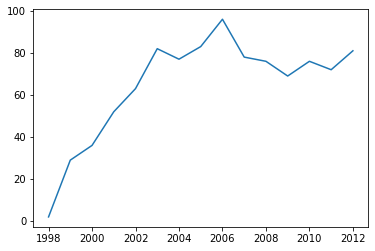

In [22]:
df = pd.read_csv(r'C:\Users\David\Documents\code\Module 2\m2-1-pandas\data\tennis.csv')

fed_wins = df.loc[(df['player1 name'] == 'Roger Federer') & (df.win == 1) | (df['player2 name'] == 'Roger Federer') & (df.win == 0)]

win_cash = fed_wins.loc[(fed_wins['tournament round'] == 'F')]

win_cash['tournament prize money'].str.replace('[ $ , [ < > ( ) ! A . " ]', '').astype(int)

win_cash.groupby(win_cash.year).sum()

print('The best year for money:',win_cash.loc[win_cash['tournament prize money'] == max(win_cash['tournament prize money']), 'year'].iloc[0])

fed_wins['count_me'] = 1

fed_wins.groupby(fed_wins.year).sum()

print('The best year for wins:',fed_wins.loc[fed_wins['count_me'] == max(fed_wins['count_me']), 'year'].iloc[0])

annual = fed_wins.groupby(fed_wins.year).sum()
annual.sort_values(by='count_me')

plt.plot(annual['count_me'])

print('Federer gets better! (see plot)')
plt.show()


# 5.3 Total money won

In the data, you'll find the `tournament round`, one value of which, `F` indicates the final.

Assuming Federer wins the money in the `tournament prize money` if he wins a final in a tournament, how much money has Federer made in tournaments in this dataset?

In [23]:
fed_wins = df.loc[(df['player1 name'] == 'Roger Federer') & (df.win == 1) | (df['player2 name'] == 'Roger Federer') & (df.win == 0)]

tour_wins = fed_wins.loc[(fed_wins['tournament round'] == 'F')]

tour_wins['tournament prize money'].str.replace('[ $ , [ < > ( ) ! A . " ]', '').astype(int).sum()


44934964